In [1]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

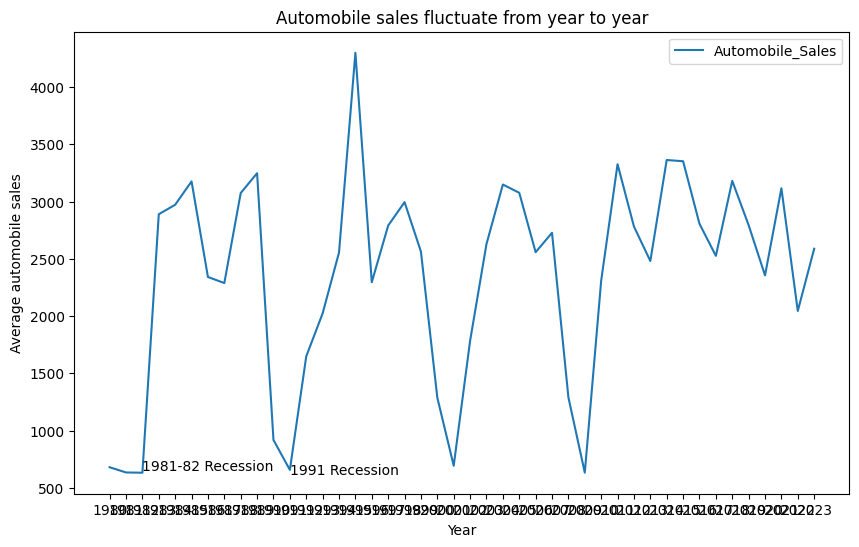

In [6]:
df_new = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
plt.xticks(list(range(1980,2024)), rotation = 45)
df_new.plot(x=df_new.index, y=df_new.values, kind='line')
plt.xlabel('Year')
plt.ylabel('Average automobile sales')
plt.title('Automobile sales fluctuate from year to year')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1991,619, '1991 Recession')
plt.legend()
plt.show()

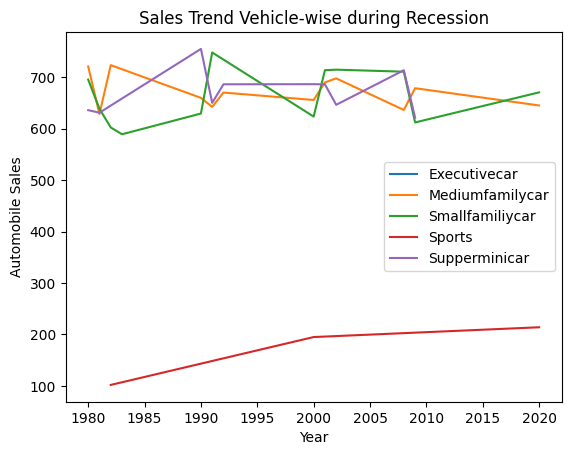

In [13]:
df_s = df[df['Recession']==1]
df_sn = df_s.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_sn.set_index('Year', inplace=True)
df_sn = df_sn.groupby(['Vehicle_Type'])['Automobile_Sales']
df_sn.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

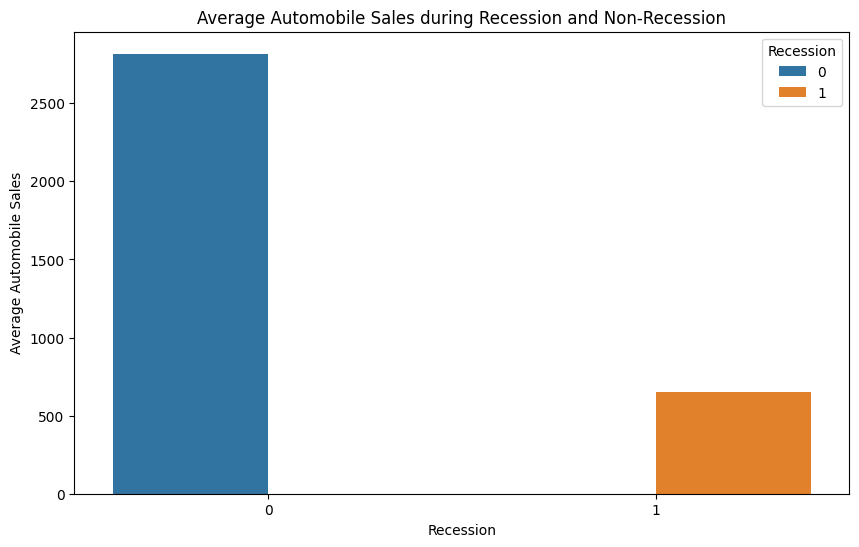

In [18]:
df_bar = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=df_bar['Recession'],y=df_bar['Automobile_Sales'], hue='Recession',data=df_bar)
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.show()

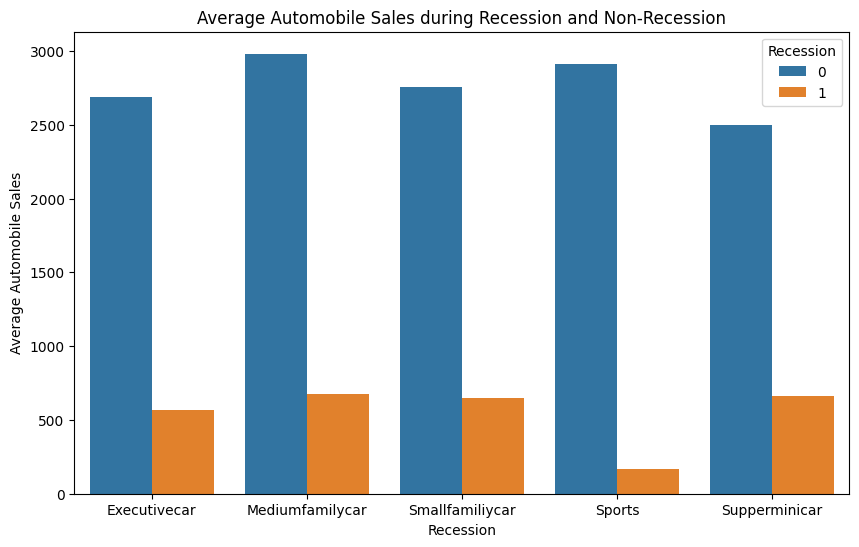

In [50]:
df_bar = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=df_bar['Vehicle_Type'],y=df_bar['Automobile_Sales'], hue='Recession',data=df_bar)
#plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.show()

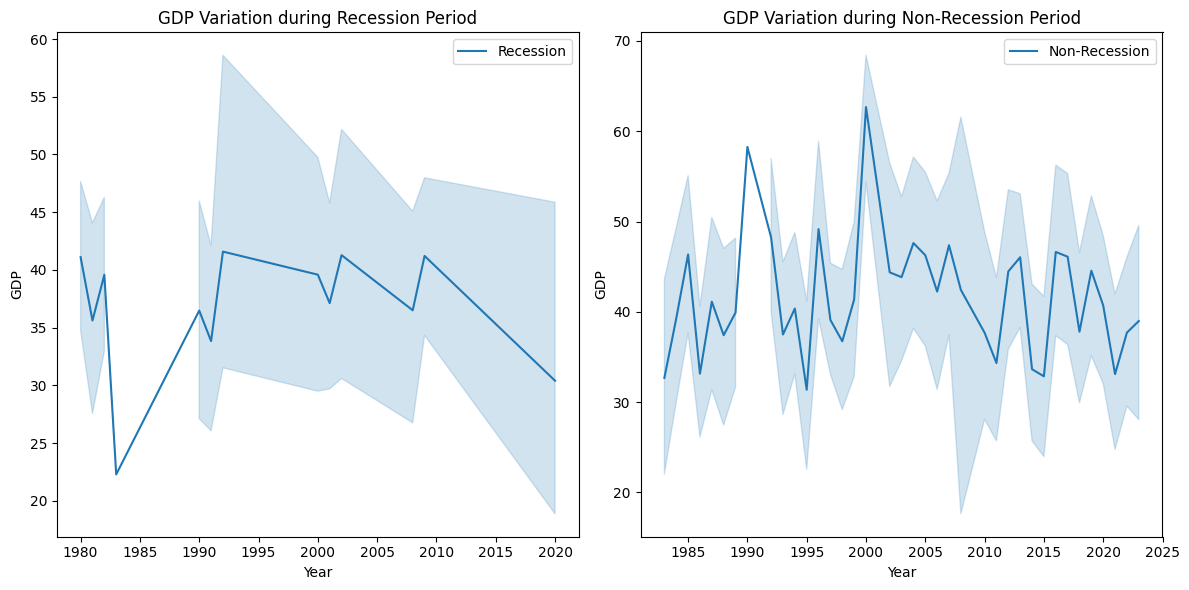

In [27]:
re_data = df[df['Recession']==1]
nore_data = df[df['Recession']==0]

fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

sns.lineplot(x='Year', y='GDP', data=re_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=nore_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

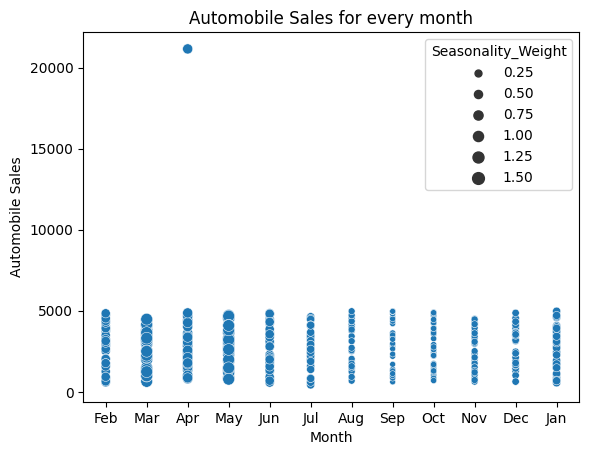

In [36]:
nore_data = df[df['Recession']==0]
size= nore_data['Seasonality_Weight']
sns.scatterplot(data=nore_data, x="Month", y="Automobile_Sales", size=size)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales for every month')
plt.show()


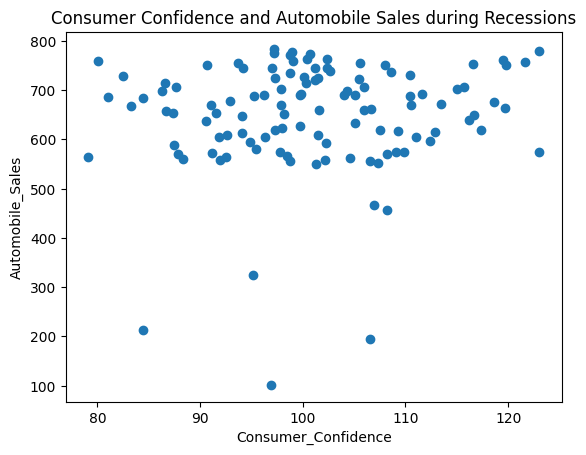

In [38]:
 #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title( 'Consumer Confidence and Automobile Sales during Recessions')
plt.show()

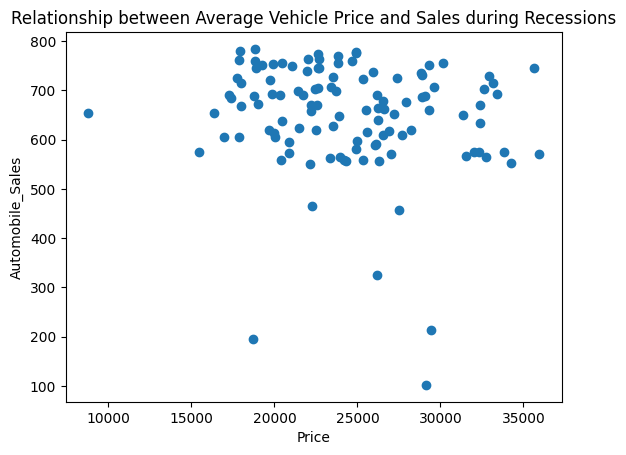

In [39]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title( 'Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

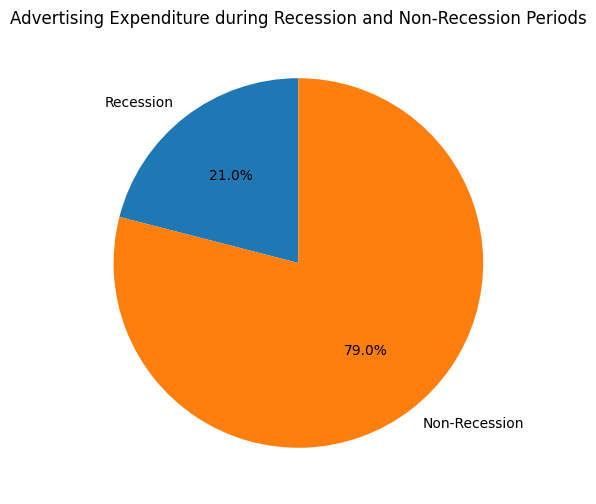

In [42]:
re_data = df[df['Recession']==1]
nore_data = df[df['Recession']==0]

RAtotal = re_data['Advertising_Expenditure'].sum()
NRAtotal = nore_data['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()


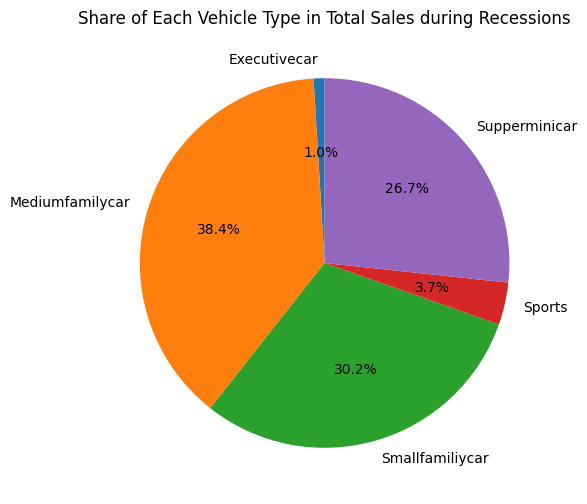

In [48]:
re_data = df[df['Recession']==1]
nore_data = df[df['Recession']==0]

Rtotal = re_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()


# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = Rtotal.index
sizes = Rtotal.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()


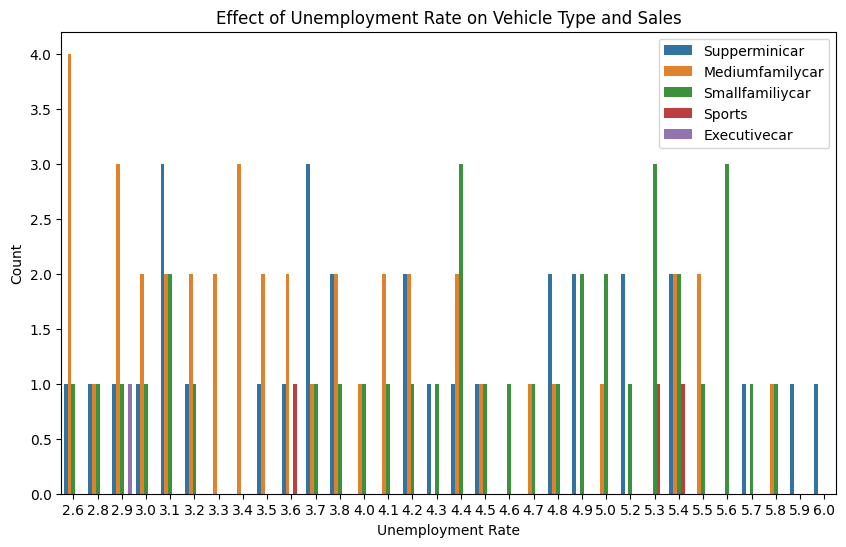

In [49]:

data= df[df['Recession'] == 1]
    
plt.figure(figsize=(10, 6))
    
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')
    
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()